In [ ]:
# 필요한 패키지 설치
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df= pd.read_excel('Raisin_Dataset.xlsx')

In [ ]:
df['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [ ]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [ ]:
#독립변수, 종속변수 나누기

x = df.drop(['Area','Class'],axis='columns')

y = df[['Class']]

In [ ]:
x

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...
895,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,476.344094,254.176054,0.845739,97653,0.658798,1258.548


In [ ]:
y

,Class
0,Kecimen
1,Kecimen
2,Kecimen
3,Kecimen
4,Kecimen
...,...
895,Besni
896,Besni
897,Besni
898,Besni


## KNN 알고리즘은 거리기반으로 진행하기 때문에 스케일링 표준화 작업이 정말 꼭 필요하다!

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:

StandardScaler = StandardScaler()

In [ ]:
StandardScaler

StandardScaler()

In [ ]:
#데이터 스케일링
df_mm = StandardScaler.fit_transform(x) #스케일링 작업

In [ ]:
df_mm# 스케일링 값

array([[ 0.09757695, -0.02395819,  0.42314164, -0.01570903,  1.10674264,
         0.06627397],
       [-0.20901207, -0.22929222,  0.22447639, -0.3042482 , -0.28777679,
        -0.16125245],
       [ 0.09775835,  0.23698797,  0.18623907,  0.06211335, -1.15824974,
         0.15594468],
       ...,
       [ 0.00670023,  0.88767401, -0.6631136 ,  0.37004063,  0.77828911,
         0.46387322],
       [ 0.39160036, -0.00624644,  0.71117344,  0.15871029, -0.76180437,
         0.3385864 ],
       [ 0.69976181, -0.78493347,  1.39366043, -0.04881606, -1.26290931,
         0.39090133]])

In [ ]:
x_mm = pd.DataFrame(data= df_mm, columns=x.columns) #스케일링된 값으로 데이터프레임 다시 만들기

In [ ]:
x_mm

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274
1,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252
2,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945
3,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915
4,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639
...,...,...,...,...,...,...
895,-0.007352,-0.133092,0.395714,-0.131228,-0.574773,-0.134624
896,0.084554,0.096175,0.300071,-0.007046,-1.179518,0.176693
897,0.006700,0.887674,-0.663114,0.370041,0.778289,0.463873
898,0.391600,-0.006246,0.711173,0.158710,-0.761804,0.338586


In [ ]:
# train.test로 나눠서 진행

X_train, X_test, y_train, y_test = train_test_split(x_mm,y, train_size=0.7, random_state=111)

In [ ]:
X_train

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
228,-0.775604,0.693786,-2.786501,-0.293425,0.778323,-0.368096
195,-0.327840,0.594281,-1.007819,-0.038803,0.724907,-0.159886
150,-1.210148,-1.024176,-0.743193,-1.056384,-0.797065,-1.045548
510,0.171574,-0.345852,0.762630,-0.151818,-2.178206,0.095417
134,-0.817285,-1.004402,0.139114,-0.881007,-0.108833,-0.891392
...,...,...,...,...,...,...
275,-1.755929,-1.268568,-2.660949,-1.384141,1.749502,-1.704937
86,-0.346836,-0.376319,0.177517,-0.446272,-0.727548,-0.481425
724,0.167958,0.449039,0.078883,0.233784,0.066435,0.268290
876,1.143534,0.417677,1.007650,0.842693,-0.586692,1.110540


In [ ]:
#KNN 모델을 생성하여 진행하기
# n_neighbors , weights, metrics
cls = KNeighborsClassifier(n_neighbors= 3, weights= 'uniform', metric='minkowski') # 모델링에 필요한 알고리즘 부르기
## 간단하게 sklearn 패키지만 불러오면 된다.

cls.fit(X_train, y_train) #실제 모델 학습

# 정확도 출력
print(cls.score(X_train, y_train), 'train의 정확도')
print(cls.score(X_test, y_test),'test의 정확도')

0.9111111111111111 train의 정확도
0.8592592592592593 test의 정확도


/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


- 좋은 모델인가요!?
- trian, test 둘의 간격이 최소화되는 것이 좋은 모델로 가는 방향성
- train 당연히 높다. test는 낮겠지만 상대적으로 그래도 높은 성능 보여주는 것이 더 좋은 모델!
---

- 학습에 사용한 데이터양
- 하나의 모델이 아닌 다른 모델과도 비교
- 실제 모델의 튜닝에 대한 진행 유무 확인
- 데이터 전처리 과정도 확인
- 이외에도 여러가지를 고민해 봐야함!
- 우리가 배운 평가지표 ->F1스코어 등 다른 스코어들더 봐야한다!

### 필수과제
- 오늘 배운 KNN 알고리즘을 이용해서 다른 데이터셋을 모델링 하기!
- 정확도,f1스코어, precision, recall 값도 같이 확인해서 비교하기!

## 적절한 K의 이웃의 수를 만들어 보자!
- 엘보우차트를 통해서 적정한 k값을 확인하기!

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

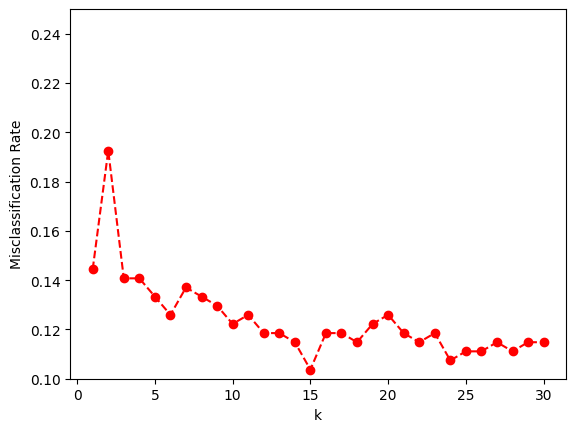

In [ ]:
#k 에 대한 엘보우 차트 시각화 하기!

#k범위 정하기

k_cnt = range(1,31)

acc_score = []
for k in k_cnt:
    cls_ml1 = KNeighborsClassifier(n_neighbors= k, weights= 'uniform')
    cls_ml1.fit(X_train, y_train)
    acc_score.append(1 - cls_ml1.score(X_test, y_test)) #오분류율에 대한 계산

plt.plot(k_cnt, acc_score, 'o--', color='red')
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.ylim(0.10, 0.25)
plt.show()

- 0.9111111111111111 train의 정확도
- 0.8592592592592593 test의 정확도

In [ ]:
#KNN 모델을 생성하여 진행하기
# n_neighbors , weights, metrics
cls = KNeighborsClassifier(n_neighbors= 15, weights= 'uniform', metric='minkowski') # 모델링에 필요한 알고리즘 부르기
## 간단하게 sklearn 패키지만 불러오면 된다.

cls.fit(X_train, y_train) #실제 모델 학습

# 정확도 출력
print(cls.score(X_train, y_train), 'train의 정확도')
print(cls.score(X_test, y_test),'test의 정확도')

0.861904761904762 train의 정확도
0.8962962962962963 test의 정확도


/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


- 거리 가중치를 두고 실제로 엘보우 차트 시각화

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

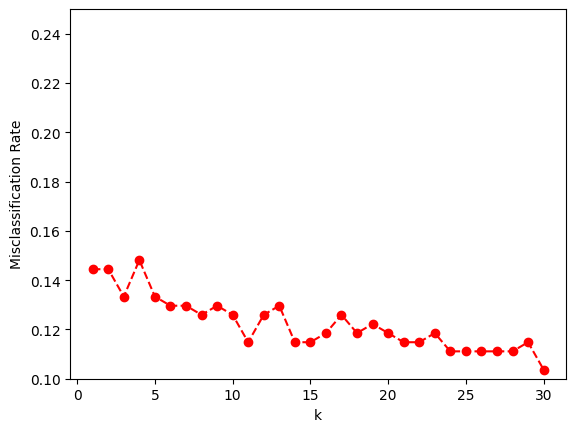

In [ ]:
#k 에 대한 엘보우 차트 시각화 하기!

#k범위 정하기

k_cnt = range(1,31)

acc_score = []
for k in k_cnt:
    cls_ml2 = KNeighborsClassifier(n_neighbors= k, weights= 'distance')
    cls_ml2.fit(X_train, y_train)
    acc_score.append(1 - cls_ml2.score(X_test, y_test)) #오분류율에 대한 계산

plt.plot(k_cnt, acc_score, 'o--', color='red')
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.ylim(0.10, 0.25)
plt.show()

- 가중치 모델로 학습한 경우, k=30

In [ ]:
#KNN 모델을 생성하여 진행하기
# n_neighbors , weights, metrics
cls = KNeighborsClassifier(n_neighbors= 30, weights= 'distance') # 모델링에 필요한 알고리즘 부르기
## 간단하게 sklearn 패키지만 불러오면 된다.

cls.fit(X_train, y_train) #실제 모델 학습

# 정확도 출력
print(cls.score(X_train, y_train), 'train의 정확도')
print(cls.score(X_test, y_test),'test의 정확도')

1.0 train의 정확도
0.8962962962962963 test의 정확도


/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


- 과적합 결과로 인해 30의 값이 적정하다고 보기 어렵다.

###  만약 k수가 더 큰 수가 좋은 결과를 나오게 하는 것 아닐까?
- k range를 좀 더 늘려보자!

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

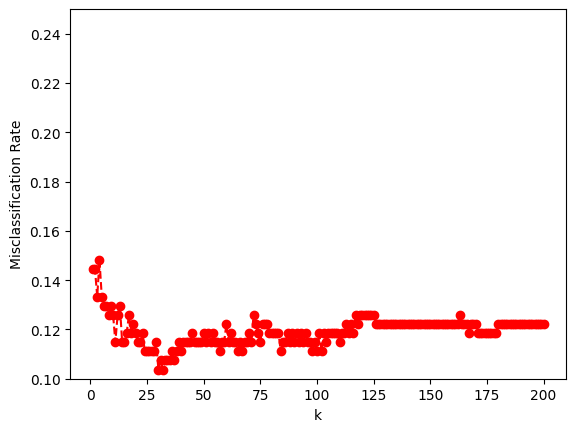

In [ ]:
#k 에 대한 엘보우 차트 시각화 하기!

#k범위 정하기

k_cnt = range(1,201)

acc_score = []
for k in k_cnt:
    cls_ml2 = KNeighborsClassifier(n_neighbors= k, weights= 'distance')
    cls_ml2.fit(X_train, y_train)
    acc_score.append(1 - cls_ml2.score(X_test, y_test)) #오분류율에 대한 계산

plt.plot(k_cnt, acc_score, 'o--', color='red')
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.ylim(0.10, 0.25)
plt.show()

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

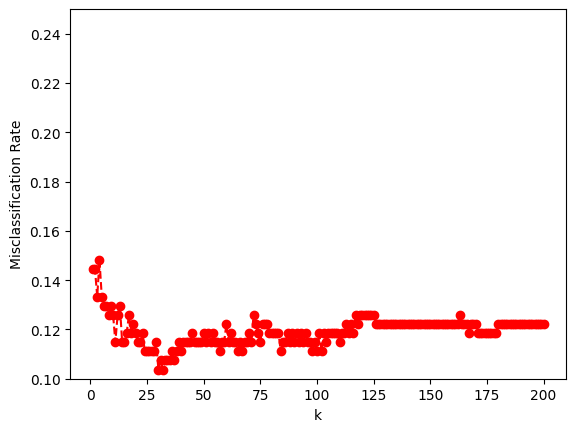

In [ ]:
#가중치 k에 대한 엘보우 차트 시각화 하기!

#k범위 정하기

k_cnt = range(1,201)

acc_score = []
for k in k_cnt:
    cls_ml2 = KNeighborsClassifier(n_neighbors= k, weights= 'distance')
    cls_ml2.fit(X_train, y_train)
    acc_score.append(1 - cls_ml2.score(X_test, y_test)) #오분류율에 대한 계산

plt.plot(k_cnt, acc_score, 'o--', color='red')
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.ylim(0.10, 0.25)
plt.show()

## 과적합이 되지 않은 적정 K의 수는?

In [ ]:
#KNN 모델을 생성하여 진행하기
# n_neighbors , weights, metrics
cls = KNeighborsClassifier(n_neighbors=2 , weights= 'distance') # 모델링에 필요한 알고리즘 부르기
## 간단하게 sklearn 패키지만 불러오면 된다.

cls.fit(X_train, y_train) #실제 모델 학습

# 정확도 출력
print(cls.score(X_train, y_train), 'train의 정확도')
print(cls.score(X_test, y_test),'test의 정확도')

1.0 train의 정확도
0.8555555555555555 test의 정확도


/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#KNN 모델을 생성하여 진행하기
# n_neighbors , weights, metrics
cls = KNeighborsClassifier(n_neighbors=6 , weights= 'uniform') # 모델링에 필요한 알고리즘 부르기
## 간단하게 sklearn 패키지만 불러오면 된다.

cls.fit(X_train, y_train) #실제 모델 학습

# 정확도 출력
print(cls.score(X_train, y_train), 'train의 정확도')
print(cls.score(X_test, y_test),'test의 정확도')

0.873015873015873 train의 정확도
0.8740740740740741 test의 정확도


/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
df['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [ ]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


### 시각화에 필요한 차원 축소를 진행!
- PCA (주성분분석) : 다차원 데이터를 -> 차원을 축소해주는 통계적 방법
- 높은 차원의 데이터 세트를 -> 더 낮은 차원의 데이터 세트로 변환, 변환 과정 속에서 데이터의 정보는 최대한 유지하력 ㅗ한다.
- 각 특성에 대해서 공분산을 계산하여 -> 해당 특성들 사이의 관계를 파악하고
- 고윳값 분해, 분산이 최대인 방향으로 데이터를 나누게 된다.
- 주성분을 선택하는 게 가장 큰 고윳값부터 순서대로 고유벡터를 정렬해서 상위에 있는 고유벡터를 선택한다.

In [ ]:
#차원축소를 진행
pca = PCA(n_components=2)

df_pca = pca.fit_transform(X_test)

# 주성분으로 변환한 테이블 생성

df_pca = pd.DataFrame(data=df_pca, columns = ['C1','C2'])

In [ ]:
df_pca

,C1,C2
0,3.081939,0.064970
1,0.562013,-0.060757
2,-0.367243,0.940178
3,-1.097875,1.047015
4,0.278526,-1.252525
...,...,...
265,-3.681597,-3.163202
266,-0.370249,0.610142
267,1.283397,-0.603552
268,-0.948760,-0.012804


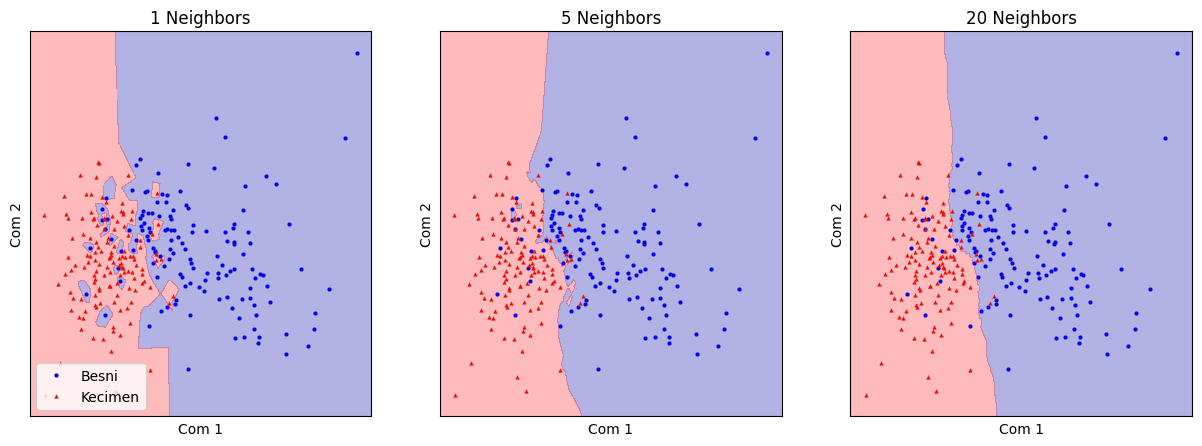

In [ ]:
# 결정 경계선을 이용해서 시각화를 진행하자!

#독립변수와 종속변수 전처리

df_pre_x = df_pca.to_numpy()
df_pre_y = y_test['Class'].to_numpy()

# 그래프 그리기

cmap_bold = ListedColormap(['#FF0000','#00FF00'])
fig, axes = plt.subplots(1,3, figsize=(15,5))


# 이웃 수에 대한 변화에 따른 결정경계의 시각화 변화 보기
# 1번, 5번 ,20번 정도로 진행
for n_neighbors, ax in zip([1,5,20], axes):
    k_num_ml = KNeighborsClassifier(n_neighbors = n_neighbors).fit(df_pre_x,df_pre_y)
    mglearn.plots.plot_2d_separator(k_num_ml,df_pre_x, fill=True, eps=0.5, ax=ax, alpha=.3)
    mglearn.discrete_scatter(df_pre_x[:,0],df_pre_x[:,1], df_pre_y, markeredgewidth=0.1, c=['b','r'], s =3, ax=ax)
    ax.set_xlabel('Com 1')
    ax.set_ylabel('Com 2')
    ax.set_title('{} Neighbors'.format(n_neighbors))

axes[0].legend(loc=3)

## PCA를 이해하기 위한 예제 코드


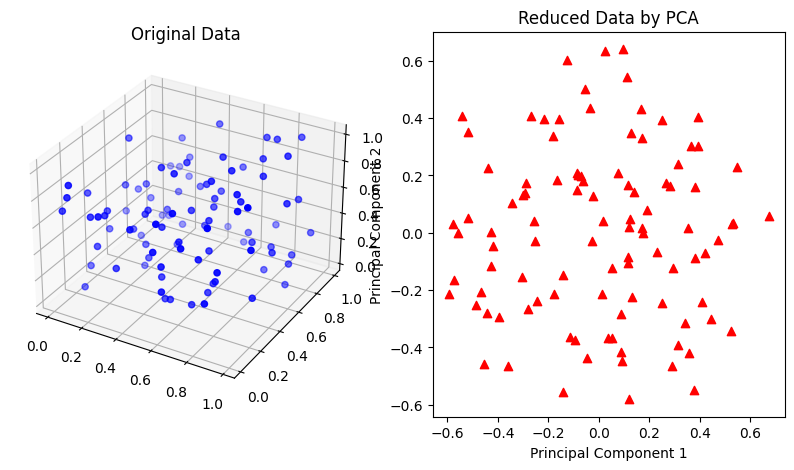

In [ ]:
# 필요한 라이브러리를 가져옵니다.
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 임의의 3차원 데이터를 생성합니다.
np.random.seed(0)  # 재현 가능한 결과를 위해 시드를 설정합니다.
X = np.random.rand(100, 3)  # 100개의 샘플과 3개의 특성을 가진 데이터 세트

# PCA 모델을 초기화하고 2차원으로 데이터를 축소합니다.
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 원래 데이터와 축소된 데이터를 시각화합니다.
plt.figure(figsize=(10, 5))

# 원래 데이터를 3D로 플롯
ax = plt.subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='blue', marker='o')
ax.set_title('Original Data')

# 축소된 데이터를 2D로 플롯
plt.subplot(122)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='red', marker='^')
plt.title('Reduced Data by PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 플롯을 표시합니다.
plt.show()